In [1]:
# !pip install emoji
# !pip install bs4
# !pip install spacymoji
# !pip install tqdm

# Authorship Profiling

What is Authorship Pro

### Unzip Data

In [3]:
# importing zipfile to unzip the data library
import zipfile
# function to unzip a file
def unzipFile(filename):
    with zipfile.ZipFile(filename, 'r') as file:
        file.extractall()
    
filename = 'data.zip'
unzipFile(filename)

### Loading Packages

- Packages used in the Assignment:

| Package Name | Description |
| --- | --- |
| **pandas** | **Manuplating the data** |
| **numpy** | **Manuplating the data** |
| **sklearn** | **preform Machine Learning and data transformations** |
| **bs4** | **Extract data from XML** |
| **os** | **To asses directory and file paths** |
| **matplotlib** | **Plotting the graphs** |
| **plotly** | **Plotting the graphs** |
| **wordcloud** | **Plotting the Wordcloud** |
| **subprocess** | **Plotting the wordCloud** |
| **tqdm** | **Reducing anxiety by keeping track of for loops** |

In [49]:
# importing the required libraries
import pandas as pd
from tqdm.notebook import tqdm
from bs4 import BeautifulSoup, CData
import os

from plotly.offline import plot
import plotly.graph_objects as go
import plotly.express as px

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

### Extracting Data from XML Fils using bs4

In [2]:
# extractData function extract's the data from everyfile xml file in the directory data
def extractData():
    # empty list to store data from each file
    File_xml = []
    
    # iterating for all the files in data
    for dirname, _, filenames in os.walk('data'):
        for filename in filenames:
            
            ## check if the file is in xml format
            if '.xml' in filename:
                
                # path stores the address of xml files
                path = os.path.join(dirname, filename)
                with open(path,  encoding="utf8") as xmlDocs:
                    xmlContent = xmlDocs.read()  # reading the file text
                    
                    # using BeautifulSoup to Parser the xml file and extractonly the tweets
                    soup = BeautifulSoup(xmlContent,'html.parser') 
                    xml=[] # empty list to store the tweets from a single file
                    
                    # gathering the tweets from files and appending them in xml list
                    for xmlTagContent in soup.find_all(text = True):
                        if isinstance(xmlTagContent, CData):
                            xml.append(xmlTagContent)
                            
                    # appending the tweets in File_xml
                    File_xml.append((filename.strip('.xml'),xml))
    
    # creating a dataframe containg document id and respective content/tweets
    xmlDf = pd.DataFrame(File_xml, columns=['id','content'])
    return xmlDf

# extractData function returns the required id content dataframe                
xmlData = extractData()

### Load train and test data

In [3]:
# loading the 
train_data = pd.read_csv('train_labels.csv')
test_data = pd.read_csv('test_labels.csv')

In [4]:
train_data.head()

,id,gender
0,d7d392835f50664fc079f0f388e147a0,male
1,ee40b86368137b86f51806c9f105b34b,female
2,919bc742d9a22d65eab1f52b11656cab,male
3,15b97a08d65f22d97ca685686510b6ae,female
4,affa98421ef5c46ca7c8f246e0a134c1,female


In [5]:
xmlData.head()

,id,content
0,850ef92a1496c0be06c57bd526c55672,[Every mini and his dog is here #fireflycinema...
1,41cb79eba7932ae827b4737180f038e8,[Brilliant reality check on ASEAN centrality b...
2,e21ecafa6bf330b4d6baeee34edc68e8,[having fun messing around in an unconventiona...
3,e486bd6ef9a792fc0dd194baff2c06eb,"[@Markgsparrow Emotionally needy, verbally and..."
4,60c4352f0ccfc5d8a41eaca7b81dadae,"[@etnow @MattMurph24 #TheTrumpEffect, @katu01 ..."


In [6]:
# merging training and testing with xmlData on column id 
# this will make sure that the each id in train and test data has its respective tweets data in the same row
train_data = train_data.merge(xmlData,how='left')
test_data = test_data.merge(xmlData,how='left')

In [7]:
train_data.head()

,id,gender,content
0,d7d392835f50664fc079f0f388e147a0,male,[@CSIFERROSCAN youch! Good things to know! Is ...
1,ee40b86368137b86f51806c9f105b34b,female,[Donald the Menace #ThanksComey https://t.co/...
2,919bc742d9a22d65eab1f52b11656cab,male,[This seems super sketch / too good to be true...
3,15b97a08d65f22d97ca685686510b6ae,female,[Just some texts with my dad about our Saturda...
4,affa98421ef5c46ca7c8f246e0a134c1,female,[Irrevocably love this talented human and so p...


In [8]:
# Converting tweets to a single tweet/string by concatenating the tweets for an id
train_data['full_content']=train_data.content.apply(lambda x : ' '.join(map(str, x)))
test_data['full_content']=test_data.content.apply(lambda x : ' '.join(map(str, x)))

In [9]:
train_data.head()

,id,gender,content,full_content
0,d7d392835f50664fc079f0f388e147a0,male,[@CSIFERROSCAN youch! Good things to know! Is ...,@CSIFERROSCAN youch! Good things to know! Is t...
1,ee40b86368137b86f51806c9f105b34b,female,[Donald the Menace #ThanksComey https://t.co/...,Donald the Menace #ThanksComey https://t.co/j...
2,919bc742d9a22d65eab1f52b11656cab,male,[This seems super sketch / too good to be true...,This seems super sketch / too good to be true:...
3,15b97a08d65f22d97ca685686510b6ae,female,[Just some texts with my dad about our Saturda...,Just some texts with my dad about our Saturday...
4,affa98421ef5c46ca7c8f246e0a134c1,female,[Irrevocably love this talented human and so p...,Irrevocably love this talented human and so pr...


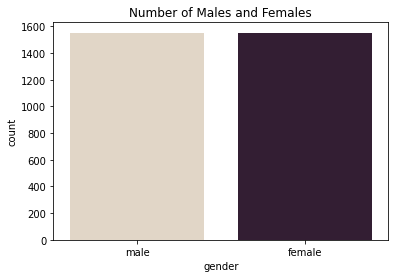

male      1552
female    1548
Name: gender, dtype: int64


In [12]:
# plot the number of males and females.
sns.countplot(x="gender", palette="ch:.25", data=train_data);
plt.title('Number of Males and Females')
plt.show()
print(train_data.gender.value_counts())

##### We can see from the grah that there are a total of 1552 males and 1548 females in the training samples.

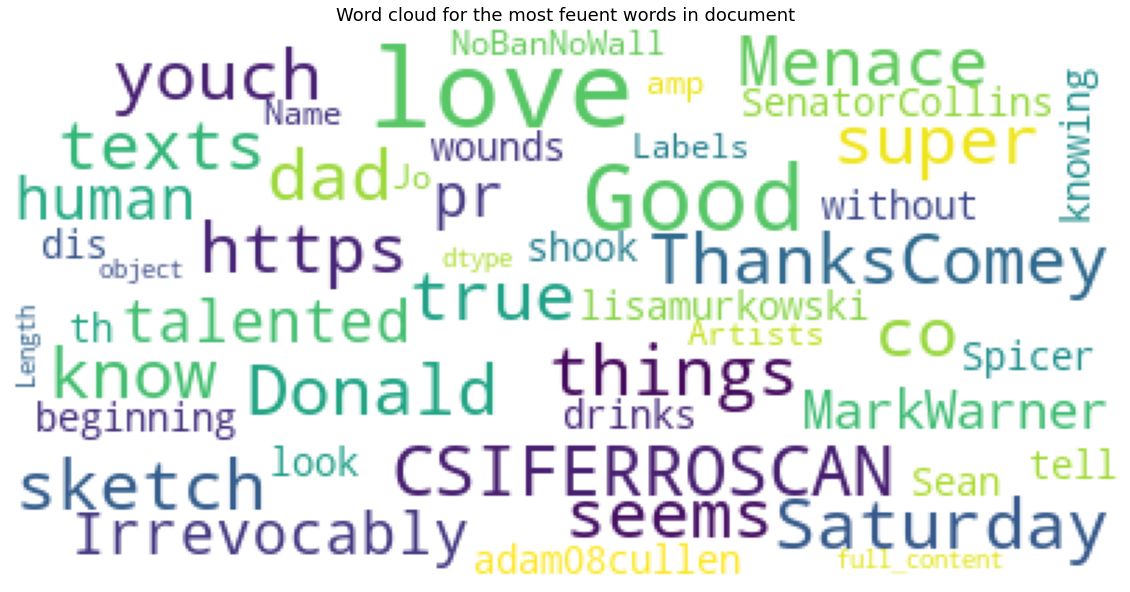

In [13]:
# Plotting word cloud for the most frequent words
import matplotlib as mpl

from subprocess import check_output
from wordcloud import WordCloud

# Set the fig size
mpl.rcParams['figure.figsize']=(20.0,15.0)  
# set the font size
mpl.rcParams['font.size']=15    
# Set the figure to save
mpl.rcParams['savefig.dpi']=100    
mpl.rcParams['figure.subplot.bottom']=.1 

#plot the word cloud
wordcloud = WordCloud(background_color='white', max_words=50, max_font_size=40, random_state=42).generate(str(train_data.full_content))

fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Word cloud for the most feuent words in document')
plt.show();

##### Visualizaing the most common words appering in the raw text document

## Text Pre-Processing

Text Preporcessing steps:
  
- Converting to lowercase
- creating tokens
- removing tokens having links (starrting with http)
- removing tokens of length = 1
- removing tokens that are in stopword

Create a dataframe where the document, its words/tokens and a join on tokens (tokenized text) are stored. For Example:

| document id | words | content |
| --- | --- | --- |
| 1 | [This, is, example...] | This is example... |
| 2 | [Sentence, in, document...] | Sentence in document |

In [14]:
# importing libraries for text pre-processing
from nltk import *
from nltk.corpus import stopwords
import emoji
import matplotlib.pyplot as plt
%matplotlib inline

import re
import string
import spacy
from spacy.lang.en import English
from sklearn.feature_extraction.text import TfidfVectorizer

In [15]:
stopwords = stopwords.words('english') # creating a list of stop words from nltk corpus

In [16]:
# to lower: converting all uppercase characters[A-Z] to lowercase[a-z]
train_data.full_content = train_data.full_content.apply(lambda x: x.lower())
train_data.full_content

0       @csiferroscan youch! good things to know! is t...
1       donald the menace #thankscomey  https://t.co/j...
2       this seems super sketch / too good to be true:...
3       just some texts with my dad about our saturday...
4       irrevocably love this talented human and so pr...
                              ...                        
3095    @markwarner @senatorcollins @lisamurkowski dis...
3096    sean spicer is beginning to look shook during ...
3097    'to love without knowing how to love wounds th...
3098    @adam08cullen tell me about it €2 drinks are n...
3099    #nobannowall: over 150 labels &amp; artists jo...
Name: full_content, Length: 3100, dtype: object

In [17]:
# tokenization: creating tokens/words for the content by spliting it on space ' '
train_data.full_content = train_data.full_content.apply(lambda x: x.split(' '))
train_data.full_content

0       [@csiferroscan, youch!, good, things, to, know...
1       [donald, the, menace, #thankscomey, , https://...
2       [this, seems, super, sketch, /, too, good, to,...
3       [just, some, texts, with, my, dad, about, our,...
4       [irrevocably, love, this, talented, human, and...
                              ...                        
3095    [@markwarner, @senatorcollins, @lisamurkowski,...
3096    [sean, spicer, is, beginning, to, look, shook,...
3097    ['to, love, without, knowing, how, to, love, w...
3098    [@adam08cullen, tell, me, about, it, €2, drink...
3099    [#nobannowall:, over, 150, labels, &amp;, arti...
Name: full_content, Length: 3100, dtype: object

In [18]:
# the cleanToken function below removes:
# 1. any token containing a link (begins with http)
# 2. any token of length = 1
# 3. token that is a stopword
def cleanToken(tokens):
    result = []
    for token in tokens:
        if 'http' not in token:
            if len(token) > 1 and token not in stopwords:
                result.append(token)
    return result

# using cleanToken function to get cleaned tokens
train_data.full_content = train_data.full_content.apply(lambda x: cleanToken(x) )
train_data.head()

,id,gender,content,full_content
0,d7d392835f50664fc079f0f388e147a0,male,[@CSIFERROSCAN youch! Good things to know! Is ...,"[@csiferroscan, youch!, good, things, know!, s..."
1,ee40b86368137b86f51806c9f105b34b,female,[Donald the Menace #ThanksComey https://t.co/...,"[donald, menace, #thankscomey, return, nationa..."
2,919bc742d9a22d65eab1f52b11656cab,male,[This seems super sketch / too good to be true...,"[seems, super, sketch, good, true:, legit?, in..."
3,15b97a08d65f22d97ca685686510b6ae,female,[Just some texts with my dad about our Saturda...,"[texts, dad, saturday, night, plans, he's, @we..."
4,affa98421ef5c46ca7c8f246e0a134c1,female,[Irrevocably love this talented human and so p...,"[irrevocably, love, talented, human, proud...t..."


In [19]:
# doing the same pre-processing with the test content

# to lower
test_data.full_content = test_data.full_content.apply(lambda x: x.lower())
# tokenization
test_data.full_content = test_data.full_content.apply(lambda x: x.split(' '))
# cleanText function
test_data.full_content = test_data.full_content.apply(lambda x: cleanToken(x))
test_data.head()

,id,gender,content,full_content
0,d6b08022cdf758ead05e1c266649c393,male,[@JJMSports what odds he stops whining and goe...,"[@jjmsports, odds, stops, whining, goes, gets,..."
1,9a989cb04766d5a89a65e8912d448328,female,[Bingay!!!! I won a cool handy tonight #cashmo...,"[bingay!!!!, cool, handy, tonight, #cashmoney,..."
2,2a1053a059d58fbafd3e782a8f7972c0,male,[The cynical manipulation of voters' desire fo...,"[cynical, manipulation, voters', desire, hones..."
3,6032537900368aca3d1546bd71ecabd1,male,[@9NowAU cannot convert b to object... on Sony...,"[@9nowau, cannot, convert, object..., sony, br..."
4,d191280655be8108ec9928398ff5b563,male,[Cat Is a Kneading Maniac – Floppycats https:/...,"[cat, kneading, maniac, – floppycats, left, go..."


In [20]:
# Concatenating all the tokens in full_content column to a single string where each token is separated by space ' '
train_data['clean_text'] = train_data.full_content.apply(lambda x : ' '.join(map(str, x)))
train_data.head()

,id,gender,content,full_content,clean_text
0,d7d392835f50664fc079f0f388e147a0,male,[@CSIFERROSCAN youch! Good things to know! Is ...,"[@csiferroscan, youch!, good, things, know!, s...",@csiferroscan youch! good things know! sort st...
1,ee40b86368137b86f51806c9f105b34b,female,[Donald the Menace #ThanksComey https://t.co/...,"[donald, menace, #thankscomey, return, nationa...",donald menace #thankscomey return national gre...
2,919bc742d9a22d65eab1f52b11656cab,male,[This seems super sketch / too good to be true...,"[seems, super, sketch, good, true:, legit?, in...",seems super sketch good true: legit? invisible...
3,15b97a08d65f22d97ca685686510b6ae,female,[Just some texts with my dad about our Saturda...,"[texts, dad, saturday, night, plans, he's, @we...",texts dad saturday night plans he's @westernbu...
4,affa98421ef5c46ca7c8f246e0a134c1,female,[Irrevocably love this talented human and so p...,"[irrevocably, love, talented, human, proud...t...",irrevocably love talented human proud...totes ...


In [21]:
# Same step for test data
test_data['clean_text'] = test_data.full_content.apply(lambda x : ' '.join(map(str, x))) # join the tokens into back to sentences
test_data.head()

,id,gender,content,full_content,clean_text
0,d6b08022cdf758ead05e1c266649c393,male,[@JJMSports what odds he stops whining and goe...,"[@jjmsports, odds, stops, whining, goes, gets,...",@jjmsports odds stops whining goes gets proper...
1,9a989cb04766d5a89a65e8912d448328,female,[Bingay!!!! I won a cool handy tonight #cashmo...,"[bingay!!!!, cool, handy, tonight, #cashmoney,...",bingay!!!! cool handy tonight #cashmoney #howb...
2,2a1053a059d58fbafd3e782a8f7972c0,male,[The cynical manipulation of voters' desire fo...,"[cynical, manipulation, voters', desire, hones...",cynical manipulation voters' desire honest gov...
3,6032537900368aca3d1546bd71ecabd1,male,[@9NowAU cannot convert b to object... on Sony...,"[@9nowau, cannot, convert, object..., sony, br...",@9nowau cannot convert object... sony braavia ...
4,d191280655be8108ec9928398ff5b563,male,[Cat Is a Kneading Maniac – Floppycats https:/...,"[cat, kneading, maniac, – floppycats, left, go...",cat kneading maniac – floppycats left goes hys...


### N-Gram Analysis

In this section, we preform the following analysiss by visualizing the following n-grams.
- unigram
- bigram
- trigram

##### Unigrams

In [47]:
super_cleaned= train_data.clean_text.str.replace('http','')

In [45]:
# function to get the uni, bi and tri grams
def get_top_n_grams(text, n=None, ngrams = (1,1)):
    # define the Countvectorizer with the number of grams, by default its (1,1) which is unigrams
    vec = TfidfVectorizer(ngram_range= ngrams).fit(text) #
    bag_of_words = vec.transform(text)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [50]:
# Call the function get_top_n_grams for unigrams
common_words = get_top_n_grams(super_cleaned, 20)
df2 = pd.DataFrame(common_words, columns = ['unigram' , 'count'])
# plot the top 20 unigrams
fig = go.Figure([go.Bar(x=df2['unigram'], y=df2['count'])])
fig.update_layout(title=go.layout.Title(text="Top 20 unigrams in the text"))
fig.show()

##### bigrams

In [51]:
# Call the function get_top_n_grams for unigrams
common_words = get_top_n_grams(super_cleaned, 20, ngrams =(2,2))
df2 = pd.DataFrame(common_words, columns = ['unigram' , 'count'])
# plot the top 20 unigrams
fig = go.Figure([go.Bar(x=df2['unigram'], y=df2['count'])])
fig.update_layout(title=go.layout.Title(text="Top 20 bi-grams in the text"))
fig.show()

##### Trigram

In [52]:
# Call the function get_top_n_grams for unigrams
common_words = get_top_n_grams(super_cleaned, 20, ngrams =(3,3))
df2 = pd.DataFrame(common_words, columns = ['unigram' , 'count'])
# plot the top 20 unigrams
fig = go.Figure([go.Bar(x=df2['unigram'], y=df2['count'])])
fig.update_layout(title=go.layout.Title(text="Top 20 trigrams in the text"))
fig.show()

### Vectorizing

Content created for each document is sent to the TfidfVectorizer which first tokenize the content again and create vectors. Each word has a dfferent vector based on its Tfidf in the document. The TF-IDF score for the word t in the document d from the document set D is calculated as:

\begin{align}
tfidf(t, d, D) = tf(t, d) . idf(t, D)
\end{align}

Where:

\begin{align}
tf(t, D) = log(1 + freq(t, D))
\end{align}
<br>
\begin{align}
idf(t, D) = log(\frac{N}{count(d\in D: t\in d)})
\end{align}

In [22]:
# converting the labels {'male','female'} to binary values {1,0} for both train and test labels
y_train = train_data.gender.apply(lambda x: 1 if x == 'male' else 0).tolist()
y_test = test_data.gender.apply(lambda x: 1 if x == 'male' else 0).tolist()

In [23]:
# Using the TfidfVectorizer to convert tokens to tfidf vectors
vectorizer=TfidfVectorizer(analyzer='word',input='content',
                           lowercase=True,
                           token_pattern='(?u)\\b\\w\\w+\\b',
                           min_df=3,  # keeping minimum document frequency to 3
                           ngram_range=(1,2),  # creating uni-grams and bi-grams
                           tokenizer=None)

In [24]:
# using the training tweets for getting the vectors for tokens
x_train = vectorizer.fit_transform(train_data.clean_text)
# transforming the test tweets with the traiined vectorizer
x_test = vectorizer.transform(test_data.clean_text)

### Model Building  

#### Model 1

In [25]:
# Loading libraries to build the models
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression, SGDClassifier, Perceptron, PassiveAggressiveClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.svm import LinearSVC, NuSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline

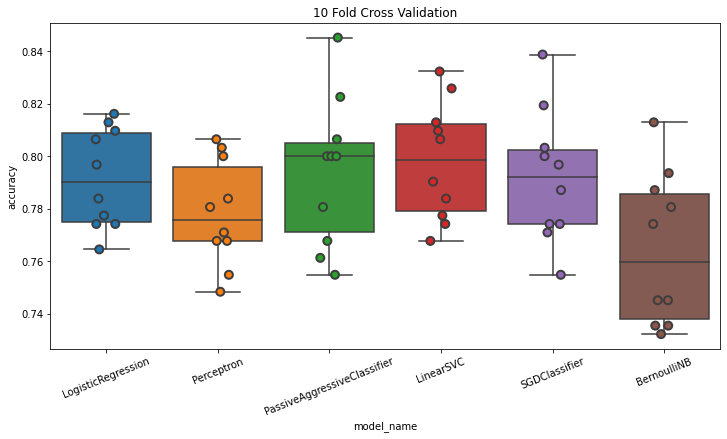

In [26]:
# List of models used
models = [
    LogisticRegression(max_iter=5000),
    Perceptron(),
    PassiveAggressiveClassifier(),
    LinearSVC(max_iter=5000),
    SGDClassifier(max_iter=20000,n_jobs=-1),
    BernoulliNB()
]

CV = 10
# empty data frame with 60 indices (= CV * #models)
cv_df = pd.DataFrame(index=range(CV * len(models)))
# empty list to store the model name, fold id, accuracy
entries = []

# iterating for each model
for model in tqdm(models):
    model_name = model.__class__.__name__ # model name
    
    accuracies = cross_val_score(model, x_train, y_train, scoring='accuracy', cv=CV)
    # appending the accuracies and model name in entries list
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
        
# renaming the columns
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])


# displaying boxplots for the accuracy values for each model over 
# the cross validation process
figure(figsize=(12,6))
sns.boxplot(x='model_name', y='accuracy', data=cv_df).set_title("10 Fold Cross Validation")
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.xticks(rotation=22)
plt.show()

### Getting accuracy for test data using following classifiers

- LinearSVC
- SGDClassifier Classifiers
- LogisticRegression
- PassiveAggressiveClassifier

In [27]:
# Using LinearSVC
model1 = LinearSVC()
model1.fit(x_train,y_train)
y_pred=model1.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.822


In [28]:
# Using SGDClassifier
model2 = SGDClassifier()
model2.fit(x_train,y_train)
y_pred=model2.predict(x_test)
accuracy_score(y_test, y_pred)

0.812

In [29]:
# Using LogisticRegression
model3 = LogisticRegression()
model3.fit(x_train,y_train)
y_pred=model3.predict(x_test)
accuracy_score(y_test, y_pred)

0.808

In [30]:
# Using PassiveAggressiveClassifier
model5 = PassiveAggressiveClassifier()
model5.fit(x_train,y_train)
y_pred=model5.predict(x_test)
accuracy_score(y_test, y_pred)

0.816

In [ ]:
# LinearSVC classifier performs the best on test data with accuracy = 82.2%.

### Hyperparameter Tuning: Model 2

Using `GridSearchCV` to find the parameters for each of the model above

In [31]:
from sklearn.model_selection import GridSearchCV

In [32]:
# empty dictionary to store model name, it's best model, and best score
models_dict = {}

# gridSearch function takes input as model, parameter grid, training input, test input and thier respective labels
def gridSearch(model, grid, x_train, y_train, x_test, y_test):
    model_name = model.__class__.__name__ # model name
    clf = GridSearchCV(model, grid, cv = 10) # defining the GridSearchCV
    clf.fit(x_train,y_train) # fitting the train data to find best parameters from parameter grid
    return(model_name, clf, clf.score(x_test,y_test)) 

In [33]:
# parameter grid for parameter C
grid1 = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid2 = {'alpha' : [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
# list of models to preform hyper parameter tuning
models = [
    LogisticRegression(max_iter=5000),
    LinearSVC(max_iter=5000),
    PassiveAggressiveClassifier()
]

In [34]:
# empty lists to store the model name, it's best model, and best score after hyperparameter tunning
modelnames = [] # list to store model names
modelprediciton = [] # list to store best parameters of hypertuned models
modelscore = [] # list to store the test accuracy of best models after preforming hyperparameter tuning

In [35]:
# running the GridSearchCV and finding the best params for each model
for model in tqdm(models):
    (name, model, score) = gridSearch(model, grid1, x_train, y_train, x_test, y_test) # call the hyperparemet tuning method
    modelnames.append(name) # apped model names
    modelprediciton.append(model) # append model parameters
    modelscore.append(score) # append best model accuracy

/home/mayank/jupyter/jupyter/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [36]:
(name, model, score) = gridSearch(SGDClassifier(), grid2, x_train, y_train, x_test, y_test)  # call the hyperparemet tuning method

In [37]:
modelnames.append(name)# apped model names
modelprediciton.append(model) # append model parameters
modelscore.append(score)# append best model accuracy

In [38]:
# printing out the best paramets for all models
for i in range(3):
    print('The best C value for {0} is {1} with a score of {2}.'
          .format(modelnames[i],modelprediciton[i].best_params_['C'],modelscore[i]))
print('The best alpha value for {0} is {1} with a score of {2}'.format(modelnames[3],modelprediciton[3].best_params_['alpha'],modelscore[3]))

The best C value for LogisticRegression is 10 with a score of 0.82.
The best C value for LinearSVC is 1 with a score of 0.822.
The best C value for PassiveAggressiveClassifier is 0.01 with a score of 0.816.
The best alpha value for SGDClassifier is 0.001 with a score of 0.804


#### Here also LinearSVC performs the best with an accuracy of 82.2%

### Ensembling: Model 3

For the ensembling task, we are using voting classifier.

The voting classifiers uses a votivng average of all the pretrained models. In this notebook, we are using hypertuned models with best parameters as input to the voting classifier.

The voting classifier works by coting the average of all the predicitons and then comes up with the best prediciton model.

In [41]:
from sklearn import model_selection
from sklearn.ensemble import VotingClassifier

Using the hyperparameter tunned models to predict the test labels through ensembling process

In [53]:
clf1 = modelprediciton[1] # best model of linearSVC
clf2 = modelprediciton[3] # best model of PassiveAggressiveClassifier
clf3 = modelprediciton[2] # best model of Sorasctic gradient classifier
clf4 = modelprediciton[0] # best model of logistic regression

In [54]:
# Create the VotingCLassifer 
eclf1 = VotingClassifier(estimators=[('svc', clf1),
                                     ('sgc', clf2),
                                     ('pac', clf3), 
                                     ('lr', clf4)],
                                     voting='hard')
# Fitting the voting classifier on training data
eclf1 = eclf1.fit(x_train,y_train)
# Calculate the accuracy on testing data
accuracy_score(y_test,eclf1.predict(x_test))

/home/mayank/jupyter/jupyter/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



0.83

As we can see the ensembling classifier preforms the best with an increase in accuracy of 83%

### storing the data

In [55]:
best_param_ense_pred = eclf1.predict(x_test) # get the predictions as predicted labels from voting classifer

In [62]:
test_data['pred_gender'] = best_param_ense_pred # storing it into testing dataframe

In [63]:
t = test_data[['id','pred_gender']] ## create the final dataframe

In [64]:
t.columns = ['id','gender'] # renaming columns

In [65]:
t.to_csv('pred_labels_kaggle.csv',index=False) # To Kaggle

In [67]:
t['gender'] = t.gender.apply(lambda x:'male' if x == 1 else 'female' ) # convert males to 1 and females to 0 

/home/mayank/jupyter/jupyter/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [69]:
t.to_csv('pred_labels.csv',index=False)# To moodleS